In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**IMPORT LIBRARY**
---
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

import xgboost as xgb

**READ FILE CSV**
---
---
* Data trong phần data drive project group 5
* Dữ liệu từ năm tháng 1/2002 đến tháng 4/2022 
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Team5-PAPERREPORT/Data/DATA(2002-2022).csv')
df

,Date,Prices
0,2002-01-01,4170449.50
1,2002-01-02,4198629.19
2,2002-01-03,4206113.25
3,2002-01-04,4190692.00
4,2002-01-07,4203514.59
...,...,...
5284,2022-04-04,44102530.37
5285,2022-04-05,44470144.87
5286,2022-04-06,44137702.89
5287,2022-04-07,44176594.17


------
* DataFrame information and structure 
-------

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5289 non-null   object 
 1   Prices  5289 non-null   float64
dtypes: float64(1), object(1)
memory usage: 82.8+ KB


In [ ]:
df = df.set_index("Date")
df.index = pd.to_datetime(df.index)
df

,Prices
Date,
2002-01-01,4170449.50
2002-01-02,4198629.19
2002-01-03,4206113.25
2002-01-04,4190692.00
2002-01-07,4203514.59
...,...
2022-04-04,44102530.37
2022-04-05,44470144.87
2022-04-06,44137702.89


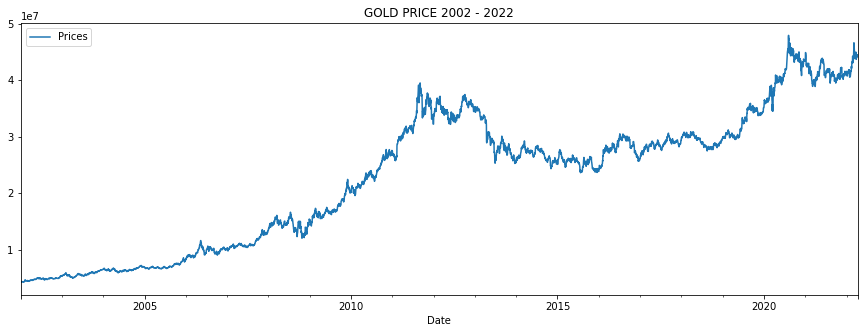

In [ ]:
df.plot(figsize=(15,5),title = 'GOLD PRICE 2002 - 2022')
plt.show()

## Train / Test Split

---
Data is splited on the day 30/3/2020. Everything prior to 30/3/2020 be our training data and keep our test data as the following date

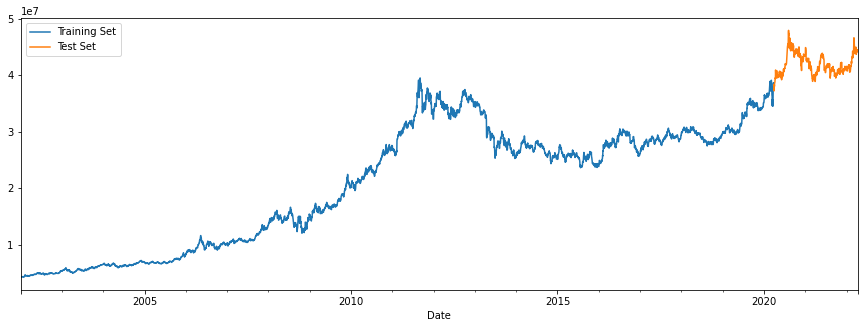

In [ ]:
  train =  df.loc[df.index < '3-30-2020']
test = df.loc[df.index >= '3-30-2020']
fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax,label = 'Test Set')
plt.legend(['Training Set','Test Set'])
plt.show()

## Feature Creation
---



In [ ]:

def create_features(df):
    #Create time series features based on time series index
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df["sin_day"] = np.sin(df['dayofyear'])
    df["cos_day"] = np.cos( df['dayofyear'])
    df['dayofweek'] = df.index.day_of_week
    df['quarter'] = df.index.quarter
    return df


In [ ]:
create_features(df)
df

,Prices,month,year,dayofyear,sin_day,cos_day,dayofweek,quarter
Date,,,,,,,,
2002-01-01,4170449.50,1,2002,1,0.841471,0.540302,1,1
2002-01-02,4198629.19,1,2002,2,0.909297,-0.416147,2,1
2002-01-03,4206113.25,1,2002,3,0.141120,-0.989992,3,1
2002-01-04,4190692.00,1,2002,4,-0.756802,-0.653644,4,1
2002-01-07,4203514.59,1,2002,7,0.656987,0.753902,0,1
...,...,...,...,...,...,...,...,...
2022-04-04,44102530.37,4,2022,94,-0.245252,0.969459,0,2
2022-04-05,44470144.87,4,2022,95,0.683262,0.730174,1,2
2022-04-06,44137702.89,4,2022,96,0.983588,-0.180430,2,2


##Create Model
---

In [ ]:
train = create_features(train)
test = create_features(test)
FEATURES = ['dayofweek', 'quarter', 'dayofyear', 'month', 'year','sin_day','cos_day']
TARGET = 'Prices'

<ipython-input-80-afb0ac3c3655>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
<ipython-input-80-afb0ac3c3655>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
<ipython-input-80-afb0ac3c3655>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [ ]:
X_train = train[FEATURES]
y_train = train[TARGET]


X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(n_estimators = 1000,early_stopping_round=50,leaning_rate=0.001)
reg.fit(X_train, y_train,
       eval_set=[(X_train,y_train),(X_test,y_test)],
       early_stopping_rounds=50,
       verbose = False)

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[08:10:27] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_round", "leaning_rate" } are not used.



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_round=50, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', leaning_rate=0.001,
             learning_rate=0.300000012, max_bin=256, max_cat_threshold=64,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, ...)

## Features Importance

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

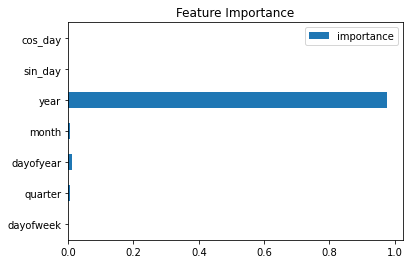

In [ ]:
fi.plot(kind='barh',title = 'Feature Importance')

## Forecast on Test
---

<ipython-input-87-266bc2db93e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=reg.predict(X_test)


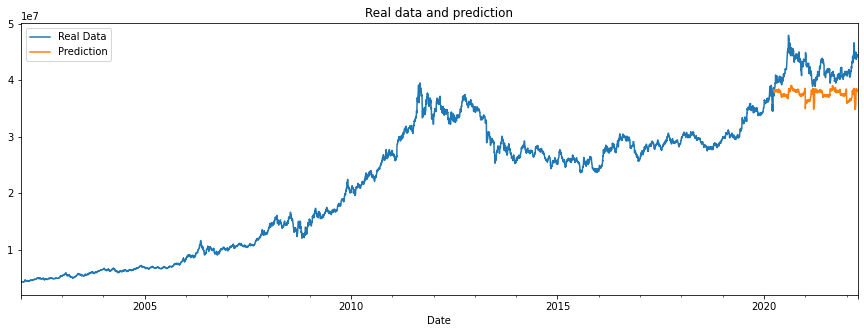

In [ ]:
test['prediction']=reg.predict(X_test)
df = df.merge(test[['prediction']],how='left',left_index = True, right_index=True)
ax = df[['Prices']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax)
plt.legend(['Real Data','Prediction'])
ax.set_title('Real data and prediction')
plt.show()
    

## Evaluate Model
--------
- look at the worst and best predictive date
-------

In [ ]:
np.abs(test[TARGET] - test['prediction'])

Date
2020-03-30      65727.90
2020-03-31     266789.00
2020-04-01     859445.60
2020-04-02      88573.15
2020-04-03     242159.80
                 ...    
2022-04-04    5761718.37
2022-04-05    6339792.87
2022-04-06    5914478.89
2022-04-07    5978930.17
2022-04-08    6404200.57
Length: 530, dtype: float64

----
- Calculating R_Squared, MAE, MAPE, MSE, RMSE
----

In [ ]:
mae = mean_absolute_error(test['Prices'], test['prediction'])
mape = mean_absolute_percentage_error(test['Prices'], test['prediction'])
mse = mean_squared_error(test['Prices'], test['prediction'])
rmse = np.sqrt(mse)
r2 = r2_score(test['Prices'], test['prediction'])

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 4357796.36
MAPE: 10.22%
MSE: 22892707830341.67
RMSE: 4784632.47
R2: -5.85
